In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/peni_/Desktop/proyecto/Proyecto-Final-Bootcamp---Dream-Team/df_sample_V2.csv')
df.head()

,urls,timestamp,record_id,Titles,Host_name,Property_types,Prices_per_night,Check_ins,Check_outs,Cleaning_fees,Location,Ratings,Num_reviews,Viajeros,Dormitorios,Camas,Baños,Maximum_guests,Otros
0,https://www.airbnb.es/rooms/961287943216806993...,2024-10-29 21:15:36,961287943216806993,Descubre nuestra habitación doble en el corazó...,Anfitrión: Green House,"Habitación en hotel en Barcelona, España",74 €,Llegada a partir de las 15:00,Salida antes de las 11:00,NaN,NaN,"4,48",201.0,2 viajeros,1 dormitorio,2 camas,"1,5 baños",2,NaN
1,https://www.airbnb.es/rooms/126009435831365996...,2024-10-29 21:15:36,1260094358313659968,"Me encanta viajar, compartir y conocer lugares...",Anfitrión: Diana Maria,"Alojamiento entero: loft en Barcelona, España",73 €,Horario de llegada: de 15:00 a 22:00,Salida antes de las 11:00,28 €,"Barcelona, Catalunya, España",Nuevo,NaN,3 viajeros,1 dormitorio,2 camas,1 baño,3,NaN
2,https://www.airbnb.es/rooms/121029592864834425...,2024-10-29 21:15:36,1210295928648344258,Cancelación gratuita antes del 3 nov. Si cance...,Anfitrión: Vero,"Habitación en Barcelona, España",36 €,Horario de llegada: de 15:00 a 20:00,Salida antes de las 12:00,31 €,"Barcelona, Catalunya, España",Nuevo,NaN,NaN,NaN,1 cama,Baño compartido,1,NaN
3,https://www.airbnb.es/rooms/119269213083576009...,2024-10-29 21:15:36,1192692130835760091,Disfruta de la privacidad de este alojamiento...,Anfitrión: Ele,"Habitación privada en: loft en Barcelona, España",58 €,Horario de llegada: de 14:00 a 21:00,Salida antes de las 12:00,20 €,"Barcelona, Catalunya, España","5,0",4.0,1 viajero,1 dormitorio,2 camas,1 baño privado,1,NaN
4,https://www.airbnb.es/rooms/120282846099520215...,2024-10-29 21:15:36,1202828460995202150,"Situado en pleno Barrio Gótico, en el corazón ...",Anfitrión: Cristian,"Alojamiento entero: apartamento en Barcelona, ...",80 €,Llegada a partir de las 15:00,Salida antes de las 11:00,45 €,"Barcelona, Catalunya, España","4,75",4.0,4 viajeros,2 dormitorios,2 camas,1 baño,4,NaN


In [3]:
df = df.drop('Viajeros', axis = 1 )
df = df.drop('Otros', axis = 1 )

Función pre limpieza

In [4]:
def clean_df(df):
    # Lista de frases o símbolos no deseados
    frases_a_eliminar = [
        #'€', 
        'Horario de llegada: de', 
        'Salida antes de las', 
        'No', 'consta',
        'que','alojamiento', 'tenga',
        'detector', 'de','monóxido', 'carbono', 
        'Quédate', 'con', 'Anfitrión',
        'Llegada', 'partir', 'de', 'las'
        'viajeros','viajero','dormitorios','dormitorio',
        'camas','cama','matrimonio',
        'Baños','Baño','baño','baños','privado', 'el', 'un',
        's','litera','l','individuae','individua', 'fexibe'

         ]
    
    # Iterar sobre cada columna del DataFrame
    for col in df.columns:
        # Comprobar si la columna es de tipo string
        if df[col].dtype == 'object':
            # Reemplazar cada frase no deseada con una cadena vacía
            for frase in frases_a_eliminar:
                df[col] = df[col].str.replace(frase, '', regex=False)
            # Limpiar espacios adicionales en las celdas
            df[col] = df[col].str.strip()
    
    # Devolver el DataFrame limpio
    return df

In [5]:
# Limpiar el DataFrame
df_clean = clean_df(df)
df_clean.head()

,urls,timestamp,record_id,Titles,Host_name,Property_types,Prices_per_night,Check_ins,Check_outs,Cleaning_fees,Location,Ratings,Num_reviews,Dormitorios,Camas,Baños,Maximum_guests
0,http://www.airbnb.e/room/961287943216806993?ad...,2024-10-29 21:15:36,961287943216806993,Decubre nuetra habitación dobe en corazón em...,: Green Houe,"Habitación en hot en Barcona, Epaña",74 €,a a 15:00,11:00,NaN,NaN,"4,48",201.0,1,2,"1,5",2
1,http://www.airbnb.e/room/1260094358313659968?a...,2024-10-29 21:15:36,1260094358313659968,"Me encanta viajar, com y ocer ugare y perona. ...",: Diana Maria,"Aojamiento entero: oft en Barcona, Epaña",73 €,15:00 a 22:00,11:00,28 €,"Barcona, Cataya, Epaña",Nuevo,NaN,1,2,1,3
2,http://www.airbnb.e/room/1210295928648344258?a...,2024-10-29 21:15:36,1210295928648344258,Cancación gratuita ante 3 nov. Si canca ante ...,: Vero,"Habitación en Barcona, Epaña",36 €,15:00 a 20:00,12:00,31 €,"Barcona, Cataya, Epaña",Nuevo,NaN,NaN,1,compartido,1
3,http://www.airbnb.e/room/1192692130835760091?a...,2024-10-29 21:15:36,1192692130835760091,Difruta a privacidad ete acogedor tranquio...,: Ee,"Habitación privada en: oft en Barcona, Epaña",58 €,14:00 a 21:00,12:00,20 €,"Barcona, Cataya, Epaña","5,0",4.0,1,2,1,1
4,http://www.airbnb.e/room/1202828460995202150?a...,2024-10-29 21:15:36,1202828460995202150,"Situado en peno Barrio Gótico, en corazón Ba...",: Critian,"Aojamiento entero: apartamento en Barcona, Epaña",80 €,a a 15:00,11:00,45 €,"Barcona, Cataya, Epaña","4,75",4.0,2,2,1,4


Prices_per_night

In [6]:
#df_clean['Prices_per_night'].isna()

In [7]:
#df_clean['Prices_per_night'] = pd.to_numeric(df_clean['Prices_per_night']) #Necesario para np tiene los €

Host_name

In [8]:
df_clean['Host_name'] = df_clean['Host_name'].str.replace(':', '')

Check_ins

In [9]:
df_clean.at[37,"Check_ins"] = "NaN"
df_clean.at[18,"Check_ins"] = "NaN"
df_clean['Check_ins'] = df_clean['Check_ins'].str.replace('flexible', 'NaN')
df_clean['Check_ins'] = df_clean['Check_ins'].str.replace('a','-')

Check_outs

In [10]:
df_clean.at[18, "Check_outs"] = "NaN"
df_clean.at[37, "Check_outs"] = "NaN"
df_clean.at[47, "Check_outs"] = "NaN"

Maxium_guests

In [11]:
df_clean['Maximum_guests'] = df_clean['Maximum_guests'].replace("."," ")
df_clean['Ratings'] = pd.to_numeric(df_clean['Ratings'], errors='coerce').fillna(0)
df_clean['Maximum_guests'] = df_clean['Maximum_guests'].replace("0"," ")

Ratings

In [17]:
df_clean['Ratings'] = df_clean['Ratings'].astype(str)

In [18]:
df_clean['Ratings'] = df_clean['Ratings'].replace ('Nuevo' , 'NaN')
df_clean['Ratings'] = df_clean['Ratings'].str.replace(',' , '.')
df_clean['Ratings'] = df_clean['Ratings'].str.replace('Sin evaluacione','0')
df_clean['Ratings'] = pd.to_numeric(df_clean['Ratings'], errors='coerce').fillna(0)

Dormitorios

In [19]:
df_clean['Dormitorios'] = pd.to_numeric(df_clean['Dormitorios'], errors='coerce').fillna(0)

Baños

In [20]:
df_clean['Baños'] = df_clean['Baños'].str.replace('compartido','0.5')
df_clean['Baños'] = pd.to_numeric(df_clean['Baños'], errors='coerce').fillna(0)

Camas

In [25]:
df_clean['Camas'] = pd.to_numeric(df_clean['Camas'], errors='coerce').fillna(0)

Cleaning_fees

In [21]:
#df_clean['Cleaning_fees'] = pd.to_numeric(df_clean['Cleaning_fees'], errors='coerce').fillna(0)

Num_reviews

In [22]:
df_clean['Num_reviews'] = pd.to_numeric(df_clean['Num_reviews'], errors='coerce').fillna(0)

--------------

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   urls              50 non-null     object 
 1   timestamp         50 non-null     object 
 2   record_id         50 non-null     int64  
 3   Titles            50 non-null     object 
 4   Host_name         50 non-null     object 
 5   Property_types    50 non-null     object 
 6   Prices_per_night  46 non-null     object 
 7   Check_ins         50 non-null     object 
 8   Check_outs        50 non-null     object 
 9   Cleaning_fees     40 non-null     object 
 10  Location          37 non-null     object 
 11  Ratings           50 non-null     float64
 12  Num_reviews       50 non-null     float64
 13  Dormitorios       50 non-null     float64
 14  Camas             50 non-null     float64
 15  Baños             50 non-null     float64
 16  Maximum_guests    50 non-null     int64  
dtyp

In [27]:
df_clean.head()

,urls,timestamp,record_id,Titles,Host_name,Property_types,Prices_per_night,Check_ins,Check_outs,Cleaning_fees,Location,Ratings,Num_reviews,Dormitorios,Camas,Baños,Maximum_guests
0,http://www.airbnb.e/room/961287943216806993?ad...,2024-10-29 21:15:36,961287943216806993,Decubre nuetra habitación dobe en corazón em...,Green Houe,"Habitación en hot en Barcona, Epaña",74 €,- - 15:00,11:00,NaN,NaN,0.0,201.0,1.0,2.0,0.0,2
1,http://www.airbnb.e/room/1260094358313659968?a...,2024-10-29 21:15:36,1260094358313659968,"Me encanta viajar, com y ocer ugare y perona. ...",Diana Maria,"Aojamiento entero: oft en Barcona, Epaña",73 €,15:00 - 22:00,11:00,28 €,"Barcona, Cataya, Epaña",0.0,0.0,1.0,2.0,1.0,3
2,http://www.airbnb.e/room/1210295928648344258?a...,2024-10-29 21:15:36,1210295928648344258,Cancación gratuita ante 3 nov. Si canca ante ...,Vero,"Habitación en Barcona, Epaña",36 €,15:00 - 20:00,12:00,31 €,"Barcona, Cataya, Epaña",0.0,0.0,0.0,1.0,0.5,1
3,http://www.airbnb.e/room/1192692130835760091?a...,2024-10-29 21:15:36,1192692130835760091,Difruta a privacidad ete acogedor tranquio...,Ee,"Habitación privada en: oft en Barcona, Epaña",58 €,14:00 - 21:00,12:00,20 €,"Barcona, Cataya, Epaña",0.0,4.0,1.0,2.0,1.0,1
4,http://www.airbnb.e/room/1202828460995202150?a...,2024-10-29 21:15:36,1202828460995202150,"Situado en peno Barrio Gótico, en corazón Ba...",Critian,"Aojamiento entero: apartamento en Barcona, Epaña",80 €,- - 15:00,11:00,45 €,"Barcona, Cataya, Epaña",0.0,4.0,2.0,2.0,1.0,4


----------------

# GRAFICAR BUENO

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

Duplicamos el df

In [29]:
df_duplicado = df_clean.copy()

Dropeamos las columnas que no queremos como por ejemplo url o ids

In [30]:
df_duplicado = df_duplicado.drop('urls', axis = 1)
df_duplicado = df_duplicado.drop('timestamp', axis = 1)
df_duplicado = df_duplicado.drop('record_id', axis = 1)

In [31]:
def separar_columnas(df):
    columnas_categoricas = []
    columnas_continuas = []
    
    for columna in df.columns:
        if pd.api.types.is_numeric_dtype(df[columna]):
            columnas_continuas.append(columna)
        else:
            columnas_categoricas.append(columna)
    
    return columnas_categoricas, columnas_continuas

In [32]:
def eda_categoricas(columna, df, target = "Prices_per_night", showfliers = True):
    
    fig, axes = plt.subplots(1, 2, figsize = (18, 4))

    sns.countplot(x=columna, data=df, ax=axes[0], hue=columna, palette="Pastel1")
    axes[0].set_title(f"Conteo de {columna}")
    sns.boxplot(x=columna, y=target, data=df, ax=axes[1], hue=columna, palette="Pastel2", showfliers=showfliers)
    axes[1].set_title(f"Boxplot de {target} por {columna}")

    
    plt.tight_layout()
    plt.show()

In [33]:
def eda_continuas(columna, df, target = "Prices_per_night", hue=None):
    
    fig, axes = plt.subplots(1, 2, figsize = (18, 3))

    sns.histplot(x = df[columna], hue=hue, kde = True, ax = axes[0] , palette = "BuGn")
    sns.scatterplot(x = df[columna], y = df[target], hue=hue, ax = axes[1] , palette = 'hsv')
    plt.show()
    
    plt.figure(figsize = (18, 2))
    sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])
    plt.show()

In [34]:
categoricas,continuas = separar_columnas(df_duplicado)

Categoricas

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\2126712614.py:11: UserWarning: Glyph 11089 (\N{BLACK SMALL STAR}) missing from current font.
  plt.tight_layout()
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\2126712614.py:11: UserWarning: Glyph 128703 (\N{SHOWER}) missing from current font.
  plt.tight_layout()
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\2126712614.py:11: UserWarning: Glyph 128701 (\N{TOILET}) missing from current font.
  plt.tight_layout()
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\2126712614.py:11: UserWarning: Glyph 129391 (\N{BAGEL}) missing from current font.
  plt.tight_layout()
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\2126712614.py:11: UserWarning: Glyph 128175 (\N{HUNDRED POINTS SYMBOL}) missing from current font.
  plt.tight_layout()
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\2126712614.py:11: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  plt.tight_layout()
C:\Users\peni_\AppData\Local\Temp\ipykernel_874

ValueError: Image size of 70073x394 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1800x400 with 2 Axes>

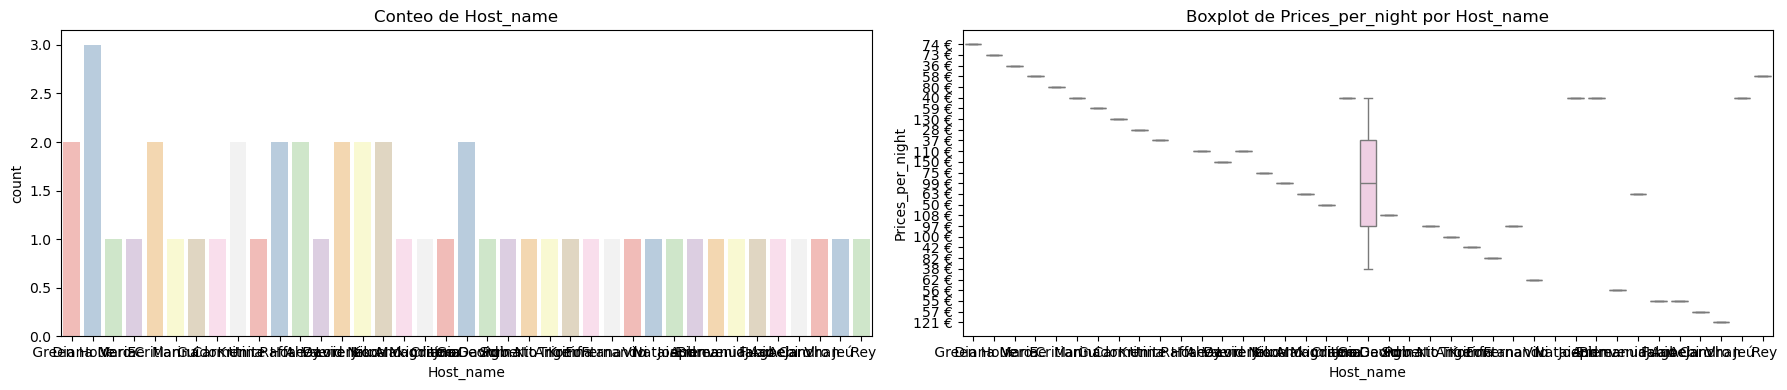

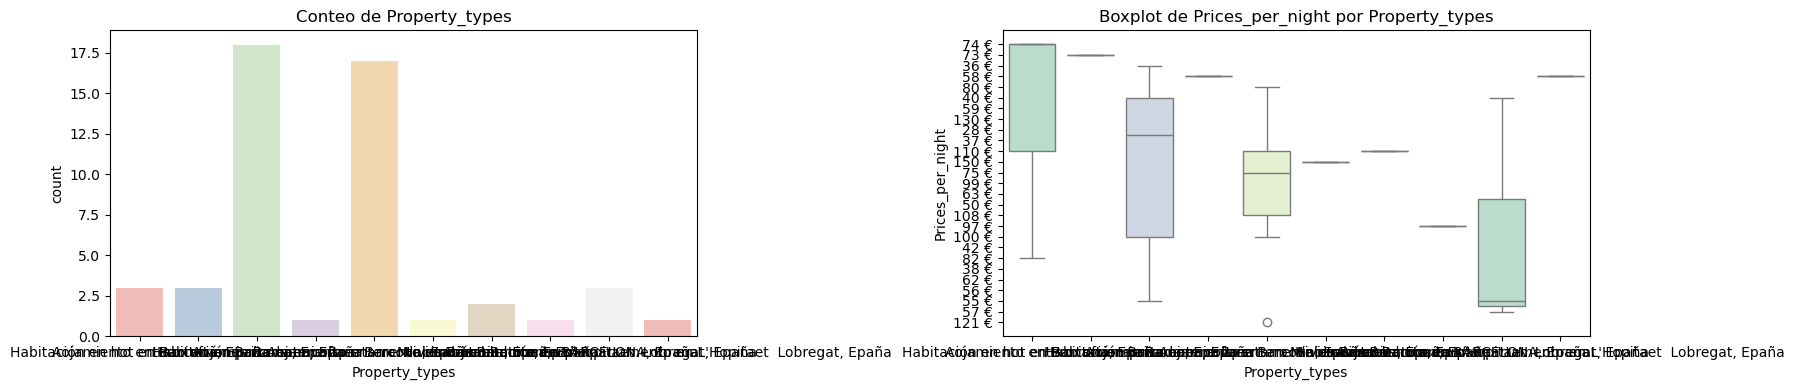

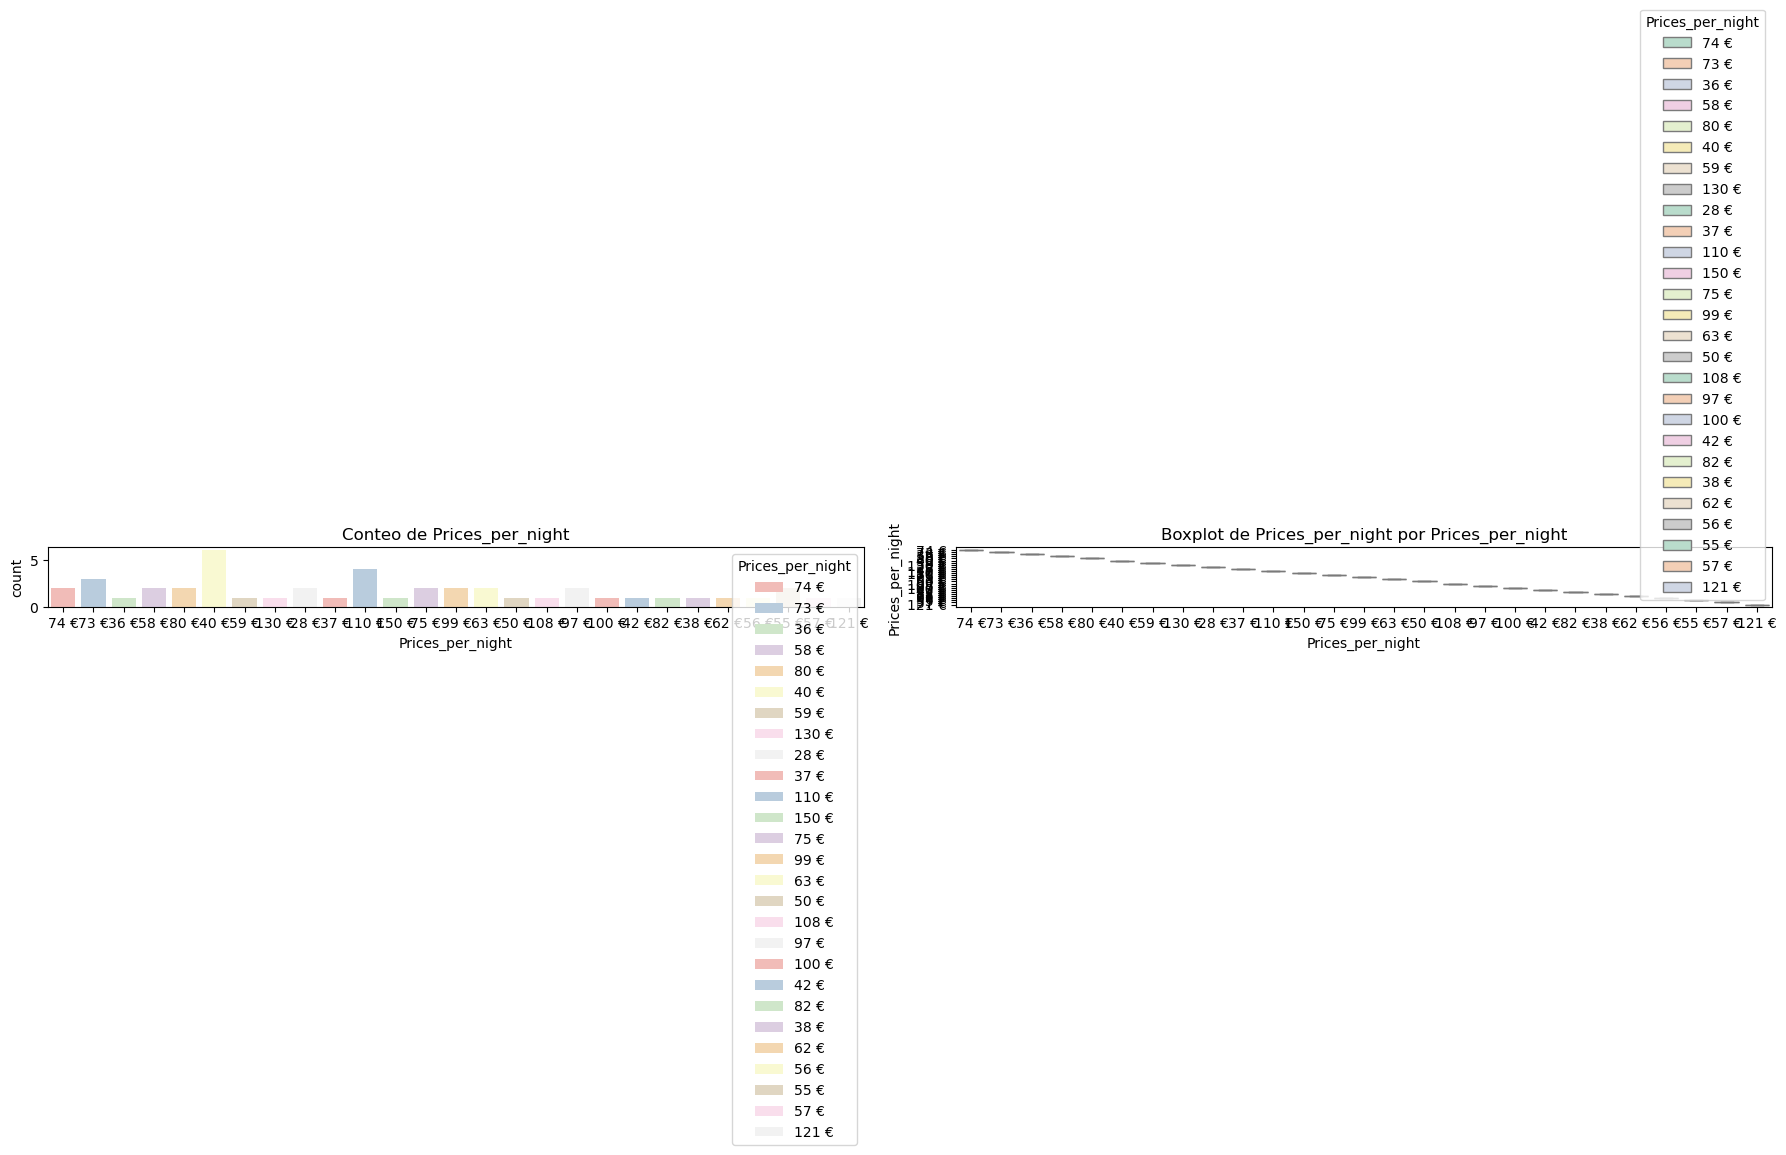

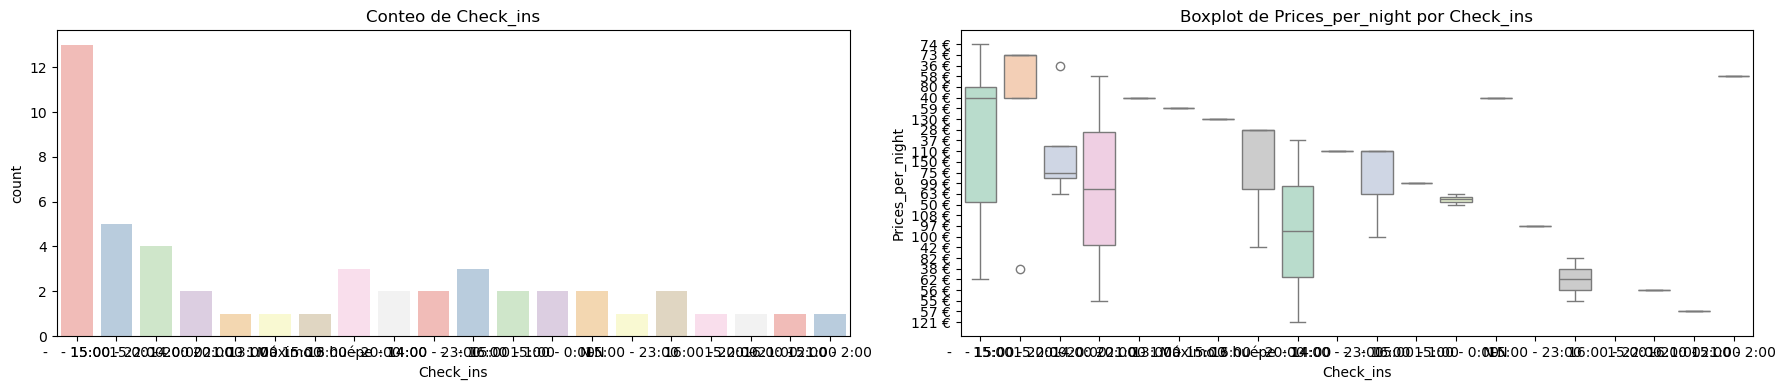

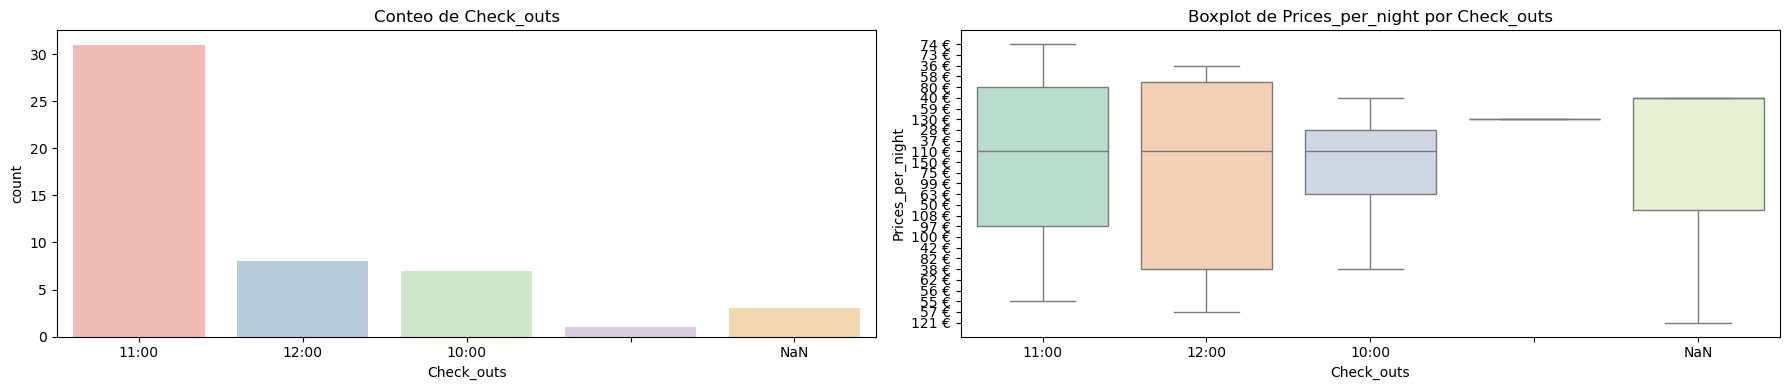

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\2126712614.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


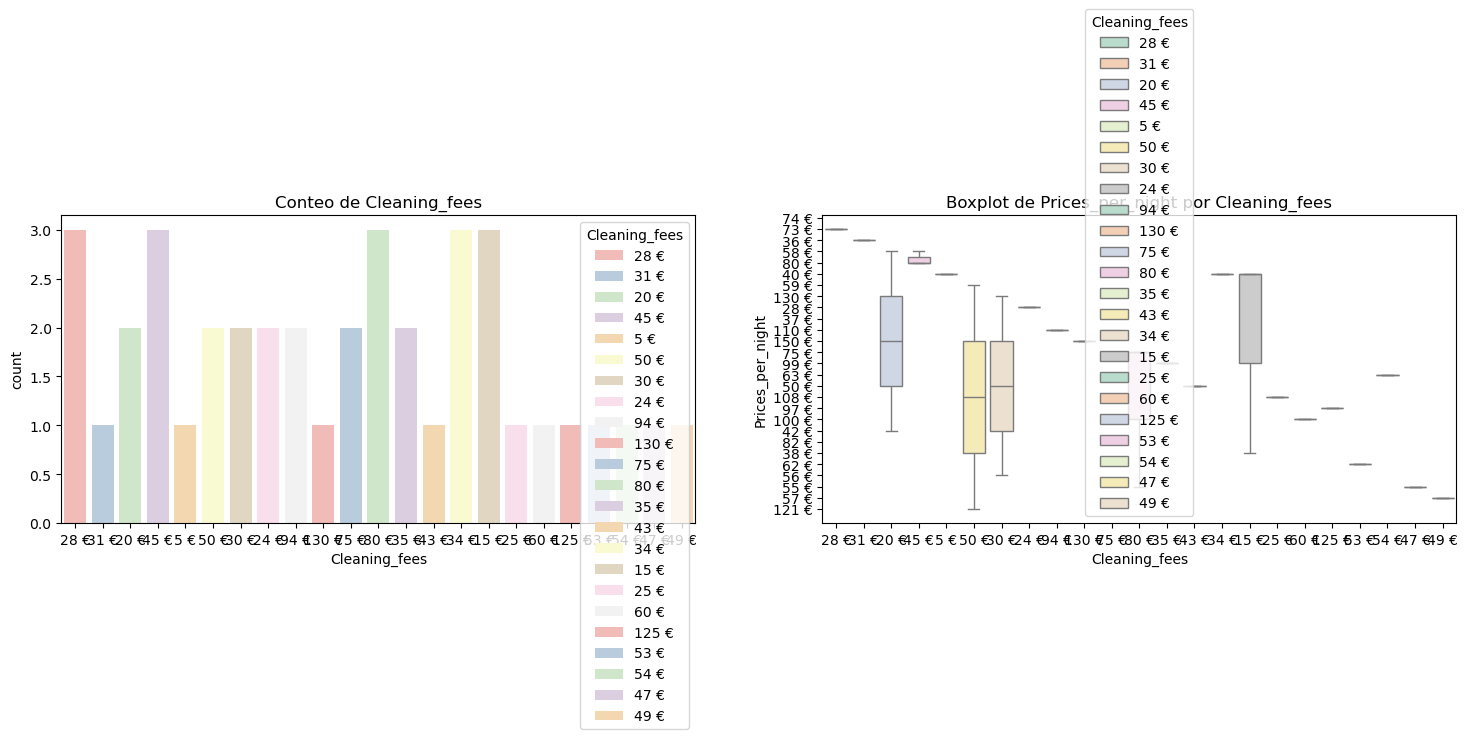

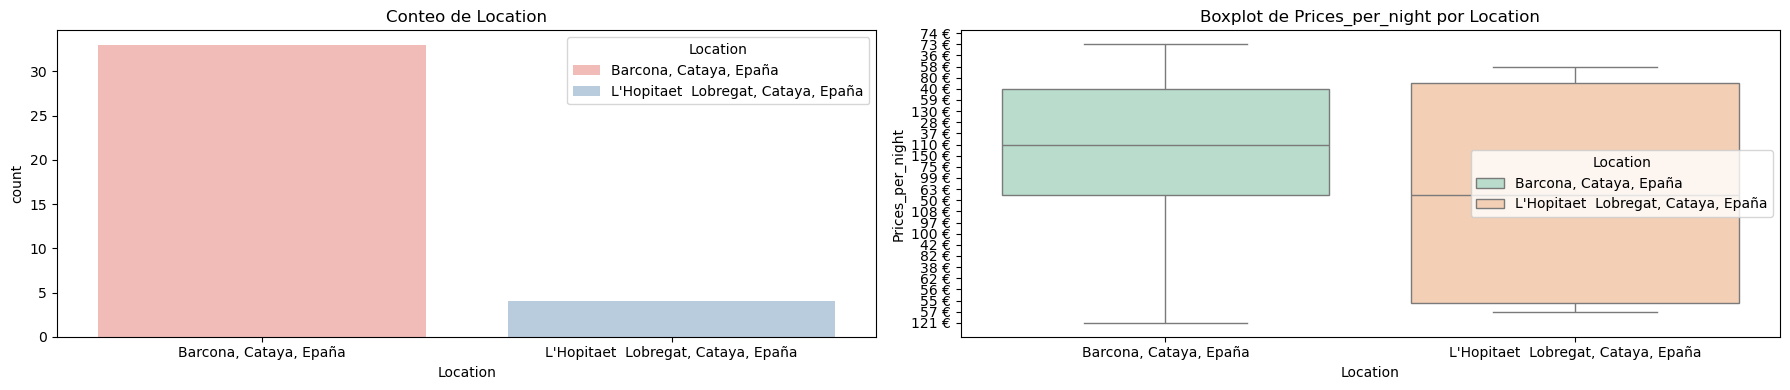

In [35]:
for columna in categoricas:
    eda_categoricas(columna = columna, df = df_duplicado)
    

Continuas

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = df[columna], hue=hue, kde = True, ax = axes[0] , palette = "BuGn")
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[columna], y = df[target], hue=hue, ax = axes[1] , palette = 'hsv')


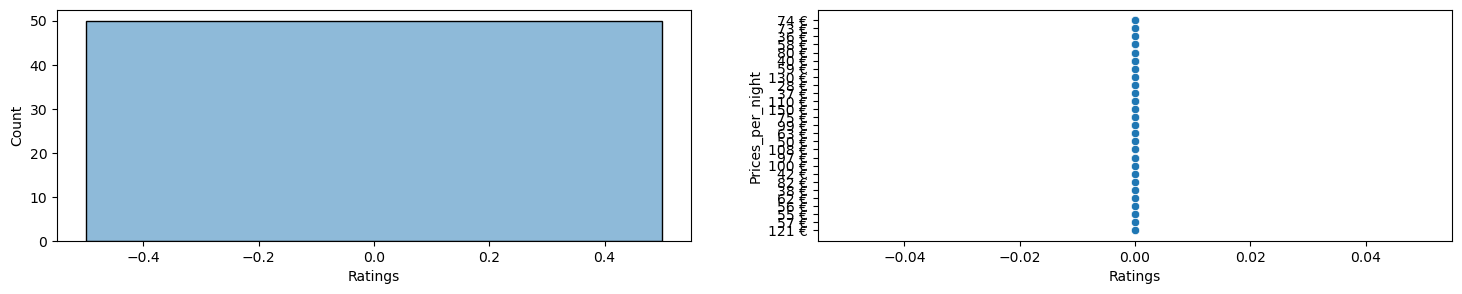

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])


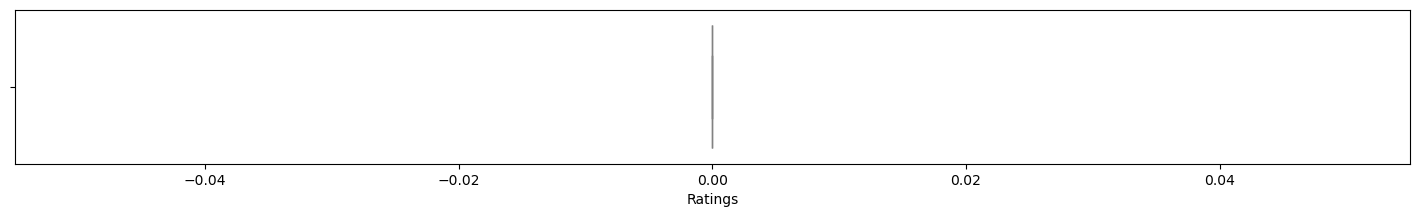

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = df[columna], hue=hue, kde = True, ax = axes[0] , palette = "BuGn")
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[columna], y = df[target], hue=hue, ax = axes[1] , palette = 'hsv')


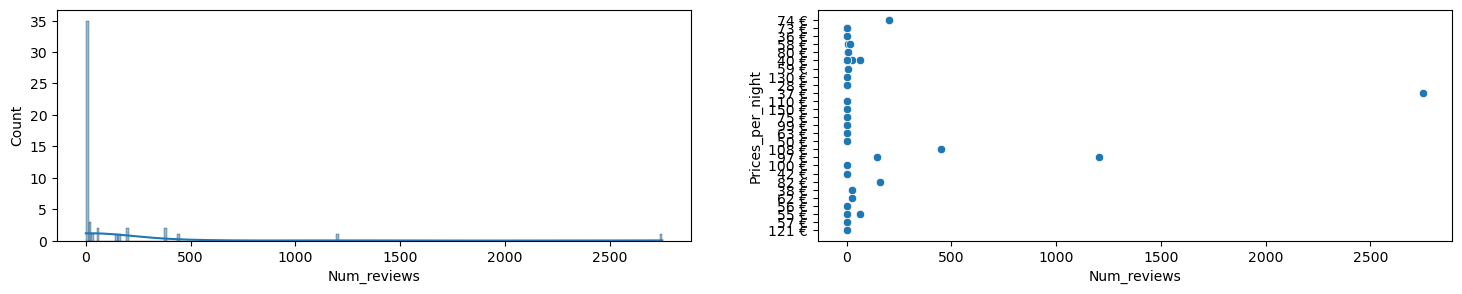

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])


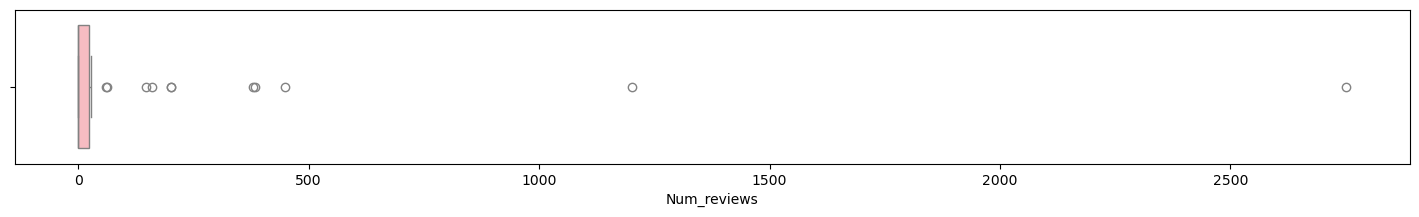

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = df[columna], hue=hue, kde = True, ax = axes[0] , palette = "BuGn")
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[columna], y = df[target], hue=hue, ax = axes[1] , palette = 'hsv')


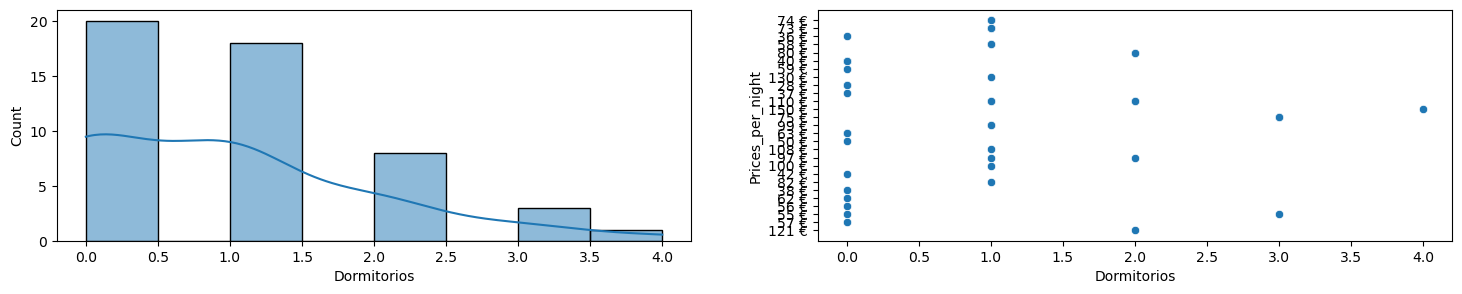

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])


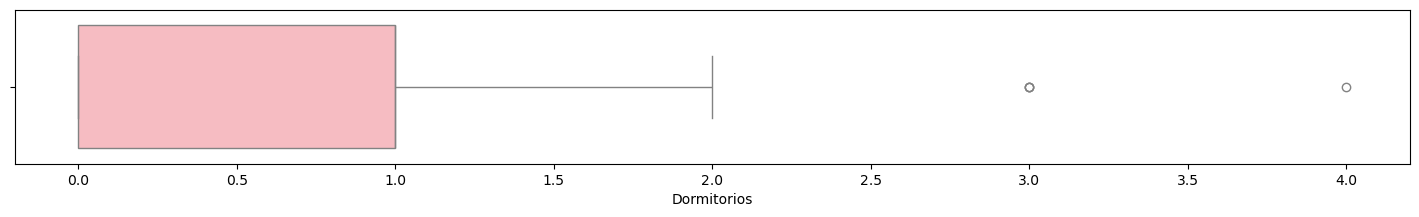

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = df[columna], hue=hue, kde = True, ax = axes[0] , palette = "BuGn")
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[columna], y = df[target], hue=hue, ax = axes[1] , palette = 'hsv')


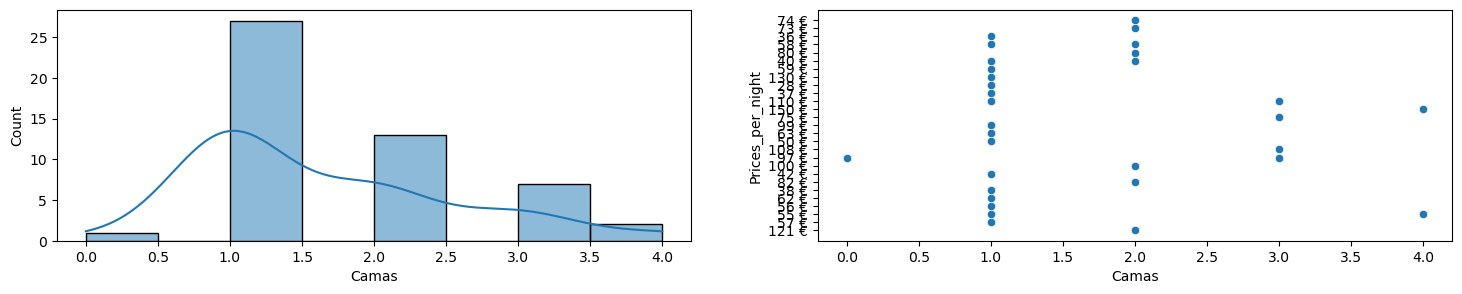

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])


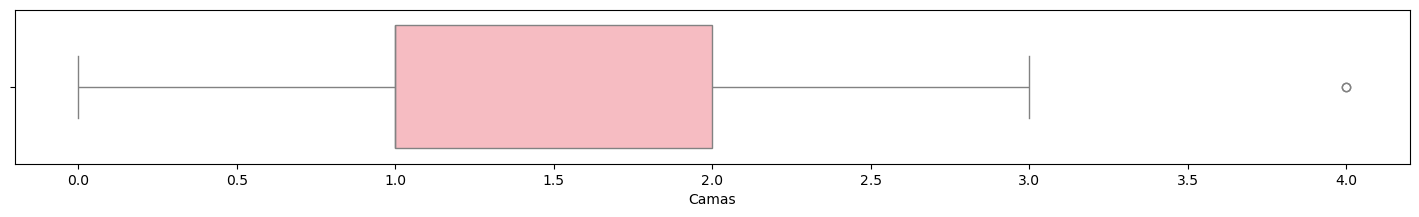

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = df[columna], hue=hue, kde = True, ax = axes[0] , palette = "BuGn")
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[columna], y = df[target], hue=hue, ax = axes[1] , palette = 'hsv')


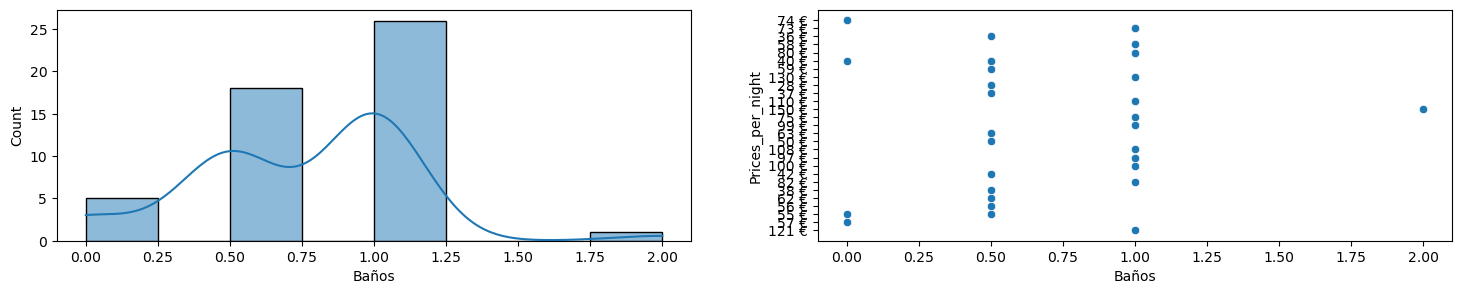

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])


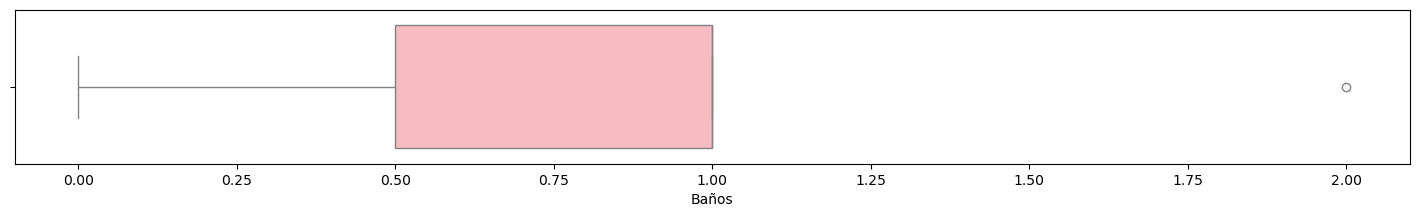

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = df[columna], hue=hue, kde = True, ax = axes[0] , palette = "BuGn")
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[columna], y = df[target], hue=hue, ax = axes[1] , palette = 'hsv')


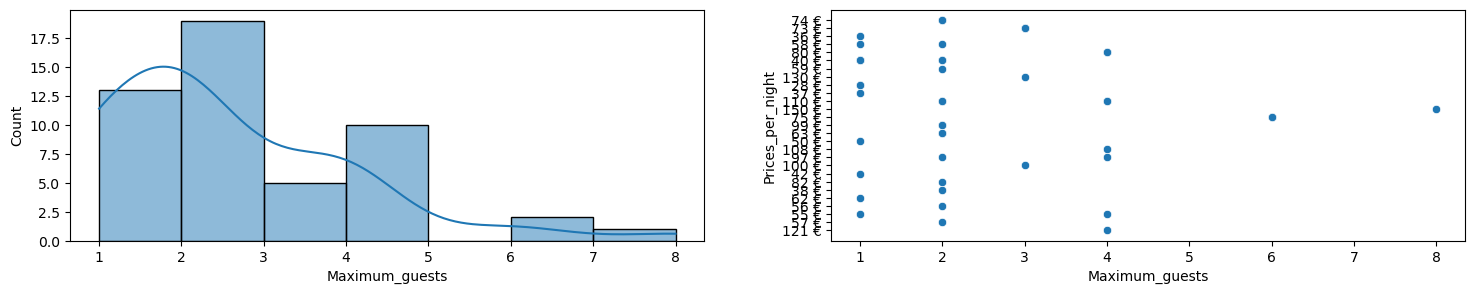

C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])
C:\Users\peni_\AppData\Local\Temp\ipykernel_8744\1343903837.py:10: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(x = df[columna],hue=hue,palette=[(255/255, 179/255, 186/255, 0.7), (185/255, 251/255, 192/255, 0.7), (227/255, 185/255, 255/255, 0.7)])


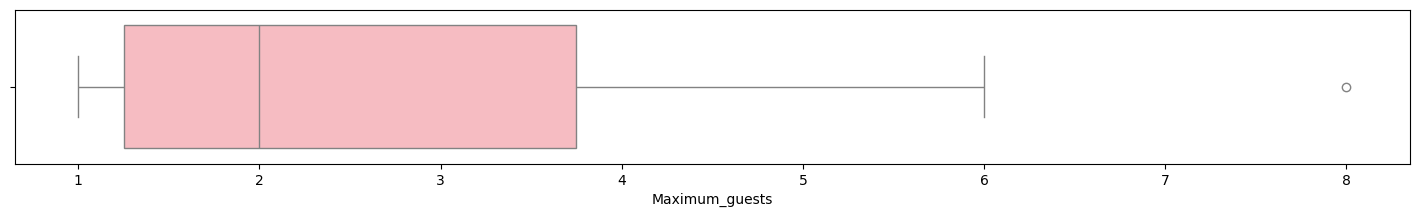

In [36]:
for columna in continuas:
    eda_continuas(columna = columna, df = df_duplicado)

Z_score

In [37]:
def z_score(columna, df, zl = 3, zr = 3):

    len_df = df.shape[0]

    mean = df[columna].mean()
    std = df[columna].std()

    lim_l = mean - zl*std
    lim_r = mean + zr*std

    sns.histplot(df[columna], kde = True)
    plt.axvline(lim_l, color = "orange")
    plt.axvline(lim_r, color = "orange")
    plt.show()
    
    df = df[df[columna].between(lim_l, lim_r) | df[columna].isna()]

    print(f"Filas restantes: {df.shape[0]/len_df*100:.4}%")

    return df.reset_index(drop = True)

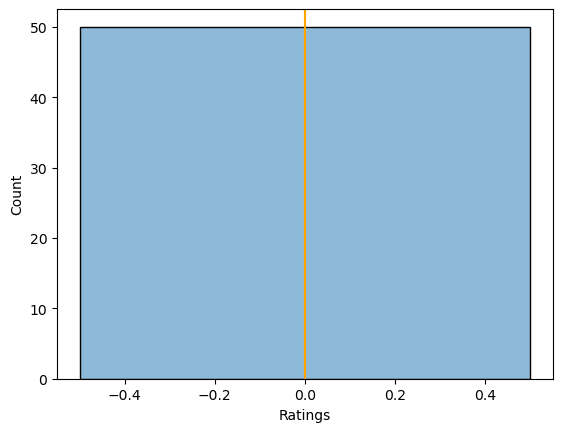

Filas restantes: 100.0%


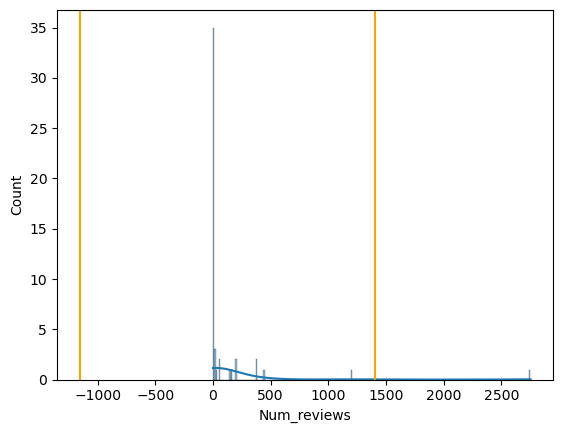

Filas restantes: 98.0%


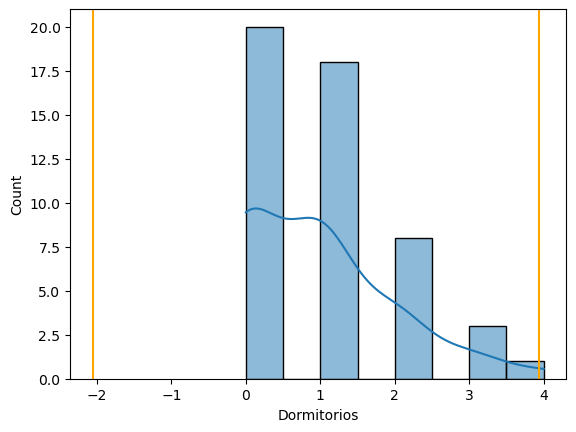

Filas restantes: 98.0%


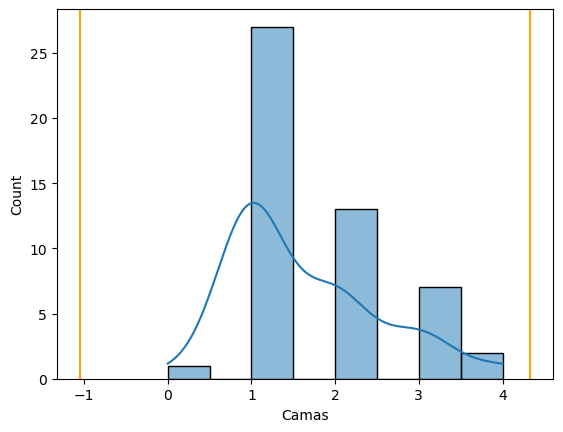

Filas restantes: 100.0%


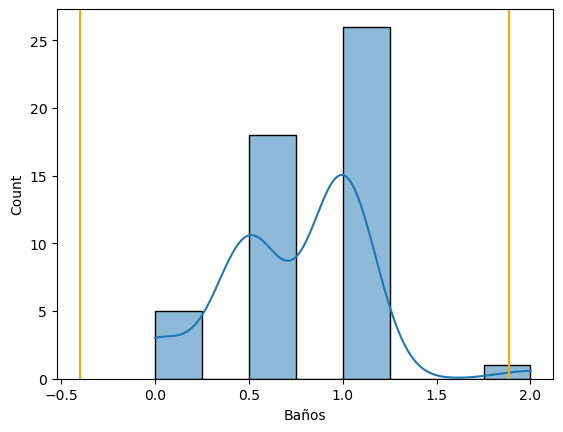

Filas restantes: 98.0%


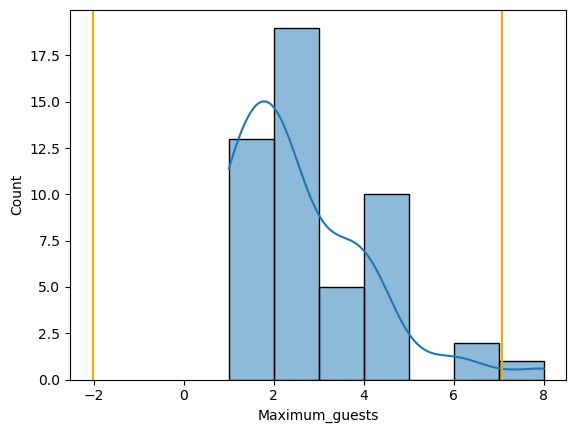

Filas restantes: 98.0%


In [38]:
for columna in continuas:
    df = z_score(columna = columna, df = df_duplicado)